In [1]:
# These are like the tools we need in our toolbox
import pandas as pd  # for handling the data table
import numpy as np   # for math stuff
import matplotlib.pyplot as plt  # to make graphs
import seaborn as sns  # for pretty graphs
from sklearn.model_selection import train_test_split  # to split data into training and testing
from sklearn.linear_model import LogisticRegression  # our model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # for performance checking


In [2]:
# Load the CSV file
df = pd.read_csv(r"C:\CODE\ds\DS\DS\PR_EXAM_DATASET\Social_Network_Ads.csv")  # make sure this file is in the same folder as your notebook

# Show the first few rows
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
# We are using 'Age' and 'EstimatedSalary' as inputs (X), and 'Purchased' as the output (y)
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']


In [4]:
# Split the data into training and testing (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [5]:
# Create the model and train it
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Predict if the user will buy the product or not
y_pred = model.predict(X_test)


In [7]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract individual values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Show all results
print(f"Confusion Matrix:\n{cm}")
print(f"True Positive (TP): {tp}")
print(f"False Positive (FP): {fp}")
print(f"True Negative (TN): {tn}")
print(f"False Negative (FN): {fn}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[65  3]
 [ 8 24]]
True Positive (TP): 24
False Positive (FP): 3
True Negative (TN): 65
False Negative (FN): 8
Accuracy: 0.89
Error Rate: 0.11
Precision: 0.89
Recall: 0.75


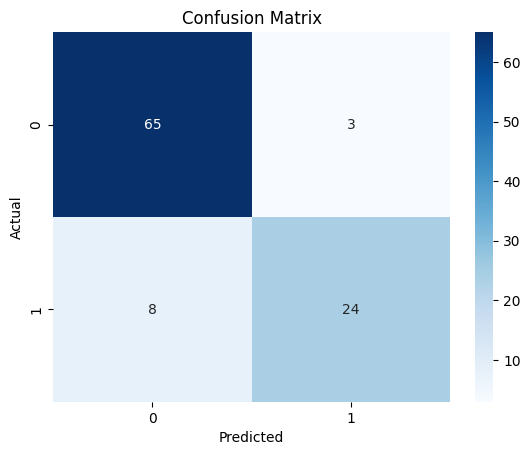

In [8]:
# Nice chart for confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
